## Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

## K-Nearest Neighbor Implementation

In [38]:
class KNN:
    """ k-nearest neighbor classifier class """

    def train(self, X, y):
        """
        Train the classifier using the given training data (X, y).
        Recall that for k-nearest neighbors this is just memorizing the training data.

        Do NOT Modify this method.

        Inputs
        - X: A numpy array of shape (N, D), where N is the number of data points,
            D is the dimensionality of each data point.
        - y: A numpy array of shape (N,) containing the training labels, where
            y[i] is the label for X[i]. With C classes, each y[i] is an integer
            from 0 to C-1.
        """
        self.X_train = X
        self.y_train = y

    def inference(self, X_test, k=1, dist_metric='dot'):
        """
        For each test example in X, this method predicts its label by majority vote
        from the k nearest training samples. It returns the predicted labels.

        Do NOT Modify this method.

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - X_train: A numpy array of shape (M, D), where M is the number of training data points,
            D is the dimensionality of each data point.
        - k: The number of neighbors to participate in voting.
            dist_metric: Determines the distance metric to use. The default is dot-product ('dot'),
            but you will need to implement 'l2' for question (b).
        Returns
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
            where y_pred[i] is the predicted label for the test point X[i].
        """
        dists = self.compute_distance(X_test, dist_metric)
        y_pred = self.predict_labels(X_test, dists, k)
        return y_pred

    def compute_distance(self, X_test, dist_metric='l2'):
        """
        Computes the distance between the training data and test data,
        using dot-product similarity or Euclidean (L2) distance as the distance metric.

        Question (a)

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - X_train: A numpy array of shape (M, D), where M is the number of training data points,
            D is the dimensionality of each data point.
        - dist_metric: Determines the distance metric to use.
        Returns
        - dists: A numpy array of shape (N, M) where N is the number of test data points,
            and M is the number of training data points, containing distances between
            each pair of test and train data points based on the given distance metric.
        """
        N = X_test.shape[0]
        M = X_train.shape[0]
        dists = np.zeros((N,M))
        
        if dist_metric=='dot':
          ##### YOUR CODE #####
            dists = -np.dot(X_test, self.X_train.T)     # negate to convert measures into distances
          #####################

        elif dist_metric=='cos':
          ##### YOUR CODE #####
            X_test_normalized = X_test / np.linalg.norm(X_test, axis=1, keepdims=True)
            X_train_normalized = self.X_train / np.linalg.norm(self.X_train, axis=1, keepdims=True)
            dists = -np.dot(X_test_normalized, X_train_normalized.T)    # negate to convert measures into distances
          #####################

        elif dist_metric=='l2':
          ##### YOUR CODE #####
            for i in range(N):
                for j in range(M):
                    dists[i, j] = np.sqrt(np.sum((X_test[i, :] - self.X_train[j, :]) ** 2))
          #####################
        return dists

    def predict_labels(self, X_test, dists, k):
        """
        For the given test image, this method takes a majority vote from k-closest points
        to predict the class of the test image.

        Question (b)

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - dists: A numpy array of shape (N, M) where N is the number of test data points,
            and M is the number of training data points, containing distances between
            each pair of test and train data points based on the given distance metric.
        - k: The number of neighbors to participate in voting.
        Returns
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
            where y_pred[i] is the predicted label for the test point X[i].
        """
        ##### YOUR CODE #####
        num_test = X_test.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
        # Find the indices of the k nearest neighbors
            closest_y_indices = np.argsort(dists[i])[:k]

        # Find the corresponding labels
            closest_y = self.y_train[closest_y_indices]

        # Count the frequency of each label in the k nearest neighbors
            labels, counts = np.unique(closest_y, return_counts=True)

        # Find the label with the maximum count (majority vote)
            y_pred[i] = labels[np.argmax(counts)]
        
        #####################
        return y_pred

    def evaluate(self, y, y_hat):
        """
        Compares the predicted labels to the ground truth y, and prints the
        classification accuracy.

        Do NOT Modify this method.

        Inputs
        - y: A numpy array of shape (N,) containing the ground truth labels, where
            N is the number of test examples. With C classes, each y[i] is an integer
            from 0 to C-1.
        - y_hat: A numpy array of shape (N,) containing the predicted labels, where
            N is the number of test examples. With C classes, each y_pred[i] is
            an integer from 0 to C-1.
        Returns:
        - accuracy
        """
        y_hat = np.expand_dims(y_hat, axis=1)
        num_correct = np.sum(y_hat == y)
        accuracy = float(num_correct) / y.shape[0]
        return accuracy

In [24]:
# X_train = np.array([[2, 2], [1, 1], [2, 2]])
# X_test = np.array([[1, 1], [2, 2]]) #(2, 3) result
# 
# N = X_test.shape[0]
# M = X_train.shape[0]
# print(X_test.shape, X_train.shape)
# 
# dists = np.zeros((N,M))
# 
# X_test_normalized = X_test / np.linalg.norm(X_test, axis=1, keepdims=True)
# X_train_normalized = X_train / np.linalg.norm(X_train, axis=1, keepdims=True)
# dists = -np.dot(X_test_normalized, X_train_normalized.T)
# print(dists)
# print (dists.shape)

(2, 2) (3, 2)
[[-1. -1. -1.]
 [-1. -1. -1.]]
(2, 3)


In [37]:
# num_test = X_test.shape[0]
# y_pred = np.zeros(num_test)
# print(y_pred.shape)
# k=3
# dists = np.array([[0, 2, 23, 43, 3, 4], [3, 32, 53, 3, 4, 5]]) 
# y_train = np.array([0, 0, 0, 1, 1, 1])
# for i in range(num_test):
#         # Find the indices of the k nearest neighbors
#     closest_y_indices = np.argsort(dists[i])[:k]
#     print(closest_y_indices)
#         # Find the corresponding labels
#     closest_y = y_train[closest_y_indices]
#     print(closest_y)
# 
#         # Count the frequency of each label in the k nearest neighbors
#     labels, counts = np.unique(closest_y, return_counts=True)
#     print(labels, counts)
#         # Find the label with the maximum count (majority vote)
#     y_pred[i] = labels[np.argmax(counts)]
#         
# print(y_pred)

(2,)
[0 1 4]
[0 0 1]
[0 1] [2 1]
[0 3 4]
[0 1 1]
[0 1] [1 2]
[0. 1.]


## Data Loading (MNIST)

In [40]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [42]:


class MNIST:
    """ Dataset and DataLoader for the MNIST dataset """

    def __init__(self, train_batch_size, test_batch_size):
        """
        Do NOT modify this function.
        """
        self.test_batch_size = test_batch_size
        self.train_batch_size = train_batch_size

    def set_data(self):
        """
        Download and Set the Training and Test data using the MNIST dataset
        Use "torchvision.datasets" module.

        Question (c)

        Conditions :
        - Data should be "downloaded" in the "data" directory of the current path
        - Data should be in "Tensor" form of pytorch.

        Returns :
        - train_data
        - test_data
        """

        print("Downloading the MNIST data...")
        ##### YOUR CODE #####
        
        transform = transforms.Compose([transforms.ToTensor()])

        # Downloading and loading MNIST training data
        train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

        # Downloading and loading MNIST test data
        test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

        #####################

        return train_data, test_data

    def load_data(self, train_data, test_data):
        """
        Create DataLoaders that iterate the train_data and the test_data.
        Each iteration of the dataloaders should return a batch of the data.
        Make sure that the data is shuffled after iterating over all batches.
        Use DataLoader class in pytorch.

        Question (c)

        Input :
        - train_data
        - test_data

        Returns :
        - train_loader
        - test_loader
        """
        ##### YOUR CODE #####
        train_loader = DataLoader(train_data, batch_size=self.train_batch_size, shuffle=True)
        test_loader = DataLoader(test_data, batch_size=self.test_batch_size, shuffle=True)
        #####################

        return train_loader, test_loader

    def print_example(self, test_loader):
        """
        Check out a sample of the test data.

        Question (c)
        (1) Extract one batch from the test_loader and print out a shape of the images in the batch.
        (2) Print out 6 images in a rectangular form (height*width = 2*3).

        Conditions :
        - Print out the Ground truths (labels) above each image as title.
            ex. Ground Truth : 8
        - Remove ticks and tick labels in the plot.
        - Print out the images in grayscale.
        - Refer to the format of the expected result below for your answer.

        Input :
        - test_loader
        """

        ##### YOUR CODE #####
        images, labels = next(iter(test_loader))
        #############################
        print("A shape of the images in a batch:", images.shape)

        fig = plt.figure()
        for i in range(6):
          plt.subplot(2, 3, i + 1)
          ##### YOUR CODE #####
          plt.imshow(images[i].squeeze(), cmap='gray')
          plt.title("Ground Truth : {}".format(labels[i].item()))
          plt.xticks([])
          plt.yticks([])
          #############################
        print(fig)

A shape of the images in a batch: torch.Size([10000, 1, 28, 28])
Figure(640x480)


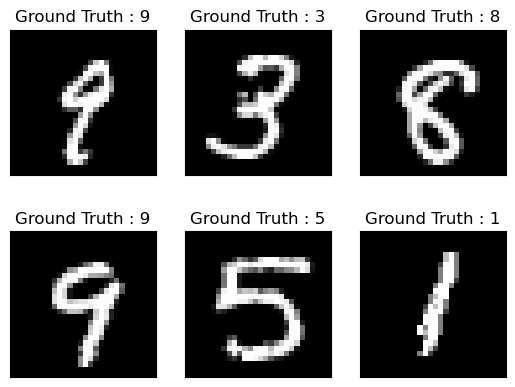

In [50]:
num_train_data = 60000
num_test_data = 10000

mnist = MNIST(train_batch_size=num_train_data, test_batch_size=num_test_data)
train_data, test_data = mnist.set_data()
train_loader, test_loader = mnist.load_data(train_data, test_data)
mnist.print_example(test_loader)

**Expected Result**

A shape of the images in a batch: torch.Size([200, 1, 28, 28])

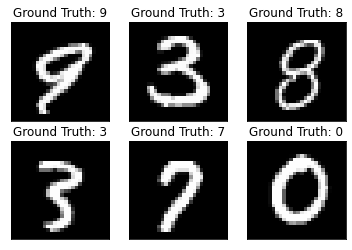

In [51]:
X_train, y_train = next(iter(train_loader))
X_train = X_train.reshape(num_train_data, -1).numpy()
y_train = y_train.unsqueeze(1).numpy()

X_test, y_test = next(iter(test_loader))
X_test = X_test.reshape(num_test_data, -1).numpy()
y_test = y_test.unsqueeze(1).numpy()

print('Sampling Training & Test Data.....\n')
print('Training data shape: {}'.format(X_train.shape))
print('Training labels shape: {}'.format(y_train.shape))
print('Test data shape: {}'.format(X_test.shape))
print('Test labels shape: {}'.format(y_test.shape))

Sampling Training & Test Data.....

Training data shape: (60000, 784)
Training labels shape: (60000, 1)
Test data shape: (10000, 784)
Test labels shape: (10000, 1)


## Model Training & Evaluation

In [45]:
model = KNN()
model.train(X_train, y_train)

In [46]:
"""
Model usage for test.
"""
K = 15
y_pred = model.inference(X_test, k=K, dist_metric='l2')
acc = model.evaluate(y_test, y_pred)
print("Accuarcy:", acc)

Accuarcy: 0.84


## Experiments

In [47]:
# Modify the number of k's and metrics to try as you want
num_ks = 50
metrics = ['dot', 'cos', 'l2']

In [48]:
# Run experiments
print_k_interval = 5
result = dict(zip(metrics, [[] for _ in range(len(metrics))]))
for metric in metrics:
    print("running KNN with {} distance metric".format(metric))
    for k in range(1, num_ks+1):
        if k % print_k_interval==0:
            print("    processing... k={:3d}".format(k))
        y_pred = model.inference(X_test, k=k, dist_metric=metric)
        acc = model.evaluate(y_test, y_pred)
        result[metric].append(acc)
    print()

running KNN with dot distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50

running KNN with cos distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50

running KNN with l2 distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50


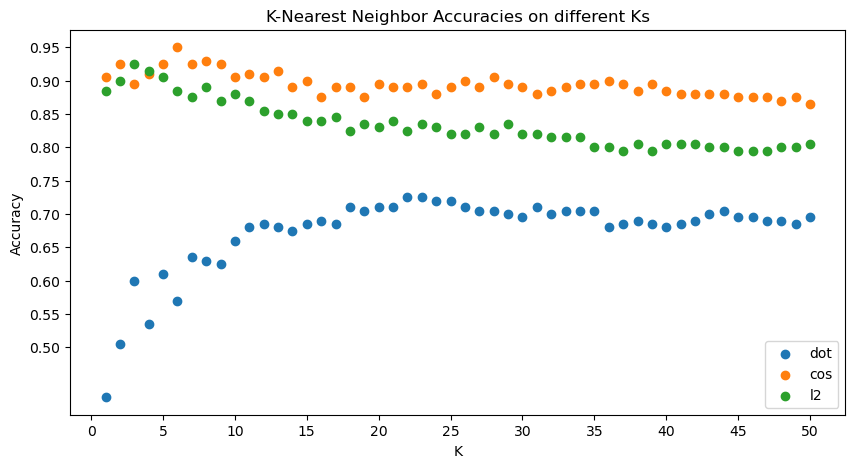

In [49]:
# Visualize the result
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

x_axis = np.arange(1, num_ks+1, 1)
for i, metric in enumerate(metrics):
    ax.scatter(x_axis, result[metric], label = metric)

ax.set(title="K-Nearest Neighbor Accuracies on different Ks")
ax.set(xlabel='K', ylabel='Accuracy')
ax.set(xticks=np.arange(0, num_ks+1,5), yticks=np.arange(0.5,1.0,0.05))
ax.legend()
plt.show()

In [11]:
###
# Question (d)
# Briefly report what you observe in the plot above.
###

K 값의 변화에 대한 각각의 distance metric의 test accuracy 비교를 해보면, 대체적으로 cosine similarity > L2 distance > dot-product similarity 순서로 좋은 성능을 보인다. Cosine similarity, l2 distance 의 경우 k 값이 작을 때 좋은 성능을 보이고 두 metric의 성능이 거의 비슷하다. 그러나 k 값이 커질수록 accuracy가 조금 내려가는 성향을 보이고 이는 l2 distance metric에서 더 선명히 확인할 수 있다. 그러므로 k 값이 커질수록 둘의 accuracy gap이 조금씩 커지며, 전반적으로는 cosine similarity 성능이 가장 좋다. 반면, dot product similarity metric 같은 경우, k 값이 작을 때는 성능이 매우 안 좋다가 k 값을 올릴수록 좋아지며 k=23 부근에서 성능이 가장 좋고, 이후 비슷하게 수렴하는 모습을 보인다.